<a href="https://colab.research.google.com/github/Optimizada/Optimizada/blob/main/buscador_galpones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalación de paquetes

In [1]:
!pip install pyfolio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.4 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88650 sha256=ada8aa4f787bcd82c2c9d00c2f074d5bdb1e299949b04eb64e7a108e0c8d9057
  Stored in directory: /root/.cache/pip/wheels/71/38/bc/e53700cfd8b0ad6b539d2fbaaf060ed8a299e7622a5b86ef42
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39754 sha256=022f64abb3fb1968455e685589605450e79aedad8f20ae7df4a9e318850b97a7
  Stored in directory: /root/.cache/pip/wheels/0e/2e/f2/d6d2d9a1eb8fbbd9949bb5d4c00f753e3b74e5bd7ed10b1d36
Successfully built pyfolio empyrical


In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
import pyfolio as pf
import seaborn as sns
from IPython.display import HTML, display
from matplotlib.patches import Patch
from tabulate import tabulate

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


# Descarga de datos y procesamiento

In [3]:
# start = datetime.datetime(2019,8,9)
start = datetime.datetime(2018,6,1)
end = datetime.date.today()

equity_ticker = ['^MERV','BBAR','GGAL','BMA','SUPV','PAM','EDN','CEPU','YPF','TGS','TEO','CRESY','MELI','MIRG.BA',
                 'IRSA.BA','TRAN.BA','TXAR.BA','ALUA.BA','METR.BA','AUSO.BA','DGCU2.BA','CGPA2.BA','HAVA.BA','SAMI.BA',
                 'BYMA.BA','COME.BA','CVH.BA','LOMA','HARG.BA','VALO.BA','TGNO4.BA','TGSU2.BA','AGRO.BA','LEDE.BA',
                 'LONG.BA','BOLT.BA','MORI.BA','CTIO.BA','MOLI.BA','CARC.BA','CECO2.BA','OEST.BA',
                 'IRCP.BA','FERR.BA','GAMI.BA','MOLA.BA','BRIO.BA','BHIP.BA','BPAT.BA','PATA.BA','MTR.BA',
                 'CELU.BA','SEMI.BA','INVJ.BA','CAPX.BA','INTR.BA','CADO.BA','FIPL.BA','DYCA.BA','RIGO.BA',
                 'EDLH.BA','GCLA.BA','GBAN.BA','BRIO6.BA','POLL.BA','GRIM.BA','ROSE.BA','GARO.BA','DOME.BA','EMDE.BA'
                ]

m = len(equity_ticker)

stockName = [m for i in range(m)]
minHistoricalDate = [m for i in range(m)]
minHistorical = [m for i in range(m)]
maxHistoricalDate = [m for i in range(m)]
maxHistorical = [m for i in range(m)]
actual = [m for i in range(m)]
varToMin = [m for i in range(m)]
varToMax = [m for i in range(m)]
varFromMin = [m for i in range(m)]
varfromMax = [m for i in range(m)]
actualVol = [m for i in range(m)]

i = 0
j = 0
u = 0

# usd = ((yf.download('GGAL.BA', start, end)/yf.download('GGAL', start, end)) * 10).interpolate()
usd = ((yf.download('YPFD.BA', start, end)/yf.download('YPF', start, end))).interpolate()

## Calculate boundaries. Si find != -1 significa que no son ADRs o el índice
for equity in equity_ticker:
    stock = yf.download(equity, start, end)
    if equity.find('.BA')!= -1 or equity.find('^MERV')!= -1:
        stock = (stock / usd).interpolate()

    min = stock['Close'].iloc[0]
    max = stock['Close'].iloc[0]
    posMin = 0
    posMax = 0

    for i in range(0, len(stock)):
        if stock['Close'].iloc[i] < min:
            min = stock['Close'].iloc[i]
            posMin = i

    for j in range(0, len(stock)):
        if stock['Close'].iloc[j] > max:
            max = stock['Close'].iloc[j]
            posMax = j

    stockName[u] = equity
    minHistoricalDate[u] = str(stock.index[posMin].date())
    minHistorical[u] = round(stock['Close'].iloc[posMin],3)
    maxHistoricalDate[u] = str(stock.index[posMax].date())
    maxHistorical[u] = round(stock['Close'].iloc[posMax],3)
    actual[u] = round(stock['Close'].iloc[-1],3)
    varToMin[u] = round(((stock['Close'].iloc[posMin] / stock['Close'].iloc[-1]) - 1) * 100, 3)
    varToMax[u] = round(((stock['Close'].iloc[posMax] / stock['Close'].iloc[-1]) - 1) * 100, 3)
    varFromMin[u] = round(((stock['Close'].iloc[-1]/stock['Close'].iloc[posMin]) - 1) * 100, 3)
    varfromMax[u] = round(((stock['Close'].iloc[-1] / stock['Close'].iloc[posMax]) - 1) * 100, 3)
    u = u + 1

## Calculate Volumen in USD
u = 0
for equity in equity_ticker:
    stock = yf.download(equity, start, end)
    if equity.find('.BA')!= -1 or equity.find('^MERV')!= -1:
        actualVol[u] = int(stock['Close'].iloc[-1] * stock['Volume'].iloc[-1] / usd['Close'].iloc[-1])
    else:
        actualVol[u] = int(stock['Close'].iloc[-1] * stock['Volume'].iloc[-1])
    u = u + 1

data = [minHistorical,minHistoricalDate,maxHistorical,maxHistoricalDate,actual,varToMin,varFromMin,varToMax,varfromMax,actualVol]
dfdata = pd.DataFrame(data, columns = equity_ticker)
dfdata.index = ['Minimo Hist','Min Hist Date','Max Hist','Max Hist Date','Actual','Var to Min Hist %',
                'Var from Min Hist %','Var to Max Hist %','Var from Max Hist %','Volumen USD']
dfdataT = dfdata.transpose()

date_start = start.strftime("%d/%m/%Y")
date_end   = end.strftime("%d/%m/%Y")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

# Tabla

In [4]:
# print(tabulate(dfdataT, headers='keys', tablefmt='github', floatfmt=".2f",numalign="center",stralign="center"))
dfdataT.sort_values(by=['Var to Max Hist %'], inplace=True, ascending=False)
display(HTML(tabulate(dfdataT, headers='keys', tablefmt='html',numalign="center",stralign="center")))
print("Start date:", date_start)
print("End   date:", date_end)

,Minimo Hist,Min Hist Date,Max Hist,Max Hist Date,Actual,Var to Min Hist %,Var from Min Hist %,Var to Max Hist %,Var from Max Hist %,Volumen USD
IRCP.BA,0.098,2024-01-22,9.15,2018-07-24,0.109,-10.212,11.374,8266.77,-98.805,0
EMDE.BA,0.006,2024-01-22,0.554,2018-06-05,0.007,-10.212,11.374,8066.22,-98.775,0
HARG.BA,0.079,2024-01-22,4.16,2018-06-05,0.088,-10.212,11.374,4616.95,-97.88,0
GAMI.BA,0.012,2024-01-22,0.62,2018-06-05,0.013,-10.212,11.374,4616.95,-97.88,0
EDLH.BA,0.017,2024-01-22,0.802,2018-06-05,0.019,-10.212,11.374,4103.32,-97.621,0
BRIO6.BA,0.024,2024-01-22,0.91,2018-06-05,0.027,-10.212,11.374,3253.46,-97.018,0
BRIO.BA,0.026,2024-01-22,0.95,2018-06-06,0.028,-10.212,11.374,3243.02,-97.009,0
MTR.BA,0.113,2024-01-22,1.801,2018-06-05,0.126,-10.212,11.374,1324.58,-92.98,0
AGRO.BA,0.016,2023-11-03,0.264,2018-06-12,0.047,-65.958,193.751,464.75,-82.293,86048
SUPV,1.25,2022-07-20,19.6,2018-06-06,4.08,-69.363,226.4,380.392,-79.184,2920871


Start date: 01/06/2018
End   date: 15/02/2024


# Descarga de datos

In [5]:
# start = datetime.datetime(2019,8,9)
start = datetime.datetime(2018,6,1)
end = datetime.date.today()

equity_ticker = ['^MERV','BBAR.BA','GGAL.BA','BMA.BA','SUPV.BA','PAMP.BA','EDN.BA','CEPU.BA','YPFD.BA','TGSU2.BA','TECO2.BA','CRES.BA','MIRG.BA',
                  'IRSA.BA','TRAN.BA','TXAR.BA','ALUA.BA','METR.BA','AUSO.BA','DGCU2.BA','CGPA2.BA','HAVA.BA','SAMI.BA',
                  'BYMA.BA','COME.BA','CVH.BA','LOMA.BA','VALO.BA','TGNO4.BA','TGSU2.BA','AGRO.BA','LEDE.BA',
                  'LONG.BA','BOLT.BA','MORI.BA','CTIO.BA','MOLI.BA','CARC.BA','CECO2.BA','OEST.BA',
                  'FERR.BA','MOLA.BA','BHIP.BA','BPAT.BA','PATA.BA',
                  'CELU.BA','SEMI.BA','INVJ.BA','CAPX.BA','INTR.BA','CADO.BA','FIPL.BA','DYCA.BA','RIGO.BA',
                  'GCLA.BA','GBAN.BA','GRIM.BA','ROSE.BA','GARO.BA'
                 ]

# No están en el análisis IRCP.BA, EDLH.BA, MTR.BA BRIO.BA HARG.BA, BRIO6.BA, EMDE.BA, GAMI.BA, BRIO.BA
# porque en yahoo finance están mal sus cotizaciones
# Me parece que al 08/02/24 empezaron a agregar bien la info de HARG
# Excluyo algunas de las acciones que se negocian por subasta (POLL, DOME)
# Falta un split de AGRO

df = yf.download(equity_ticker, start = start)['Adj Close'] # equity_ticker , auto_adjust = True

df.tail()


[*********************100%%**********************]  58 of 58 completed


Ticker,AGRO.BA,ALUA.BA,AUSO.BA,BBAR.BA,BHIP.BA,BMA.BA,BOLT.BA,BPAT.BA,BYMA.BA,CADO.BA,...,SEMI.BA,SUPV.BA,TECO2.BA,TGNO4.BA,TGSU2.BA,TRAN.BA,TXAR.BA,VALO.BA,YPFD.BA,^MERV
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-07,56.000000,998.5,2420.0,2237.350098,215.50,3766.300049,71.000000,800.0,1179.5,624.5,...,106.00,1026.849976,1813.300049,2150.5,3313.300049,1299.5,950.5,274.5,20022.550781,1152888.0
2024-02-08,52.799999,973.5,2309.0,2153.899902,196.75,3594.100098,80.099998,734.0,1140.5,583.5,...,101.50,956.900024,1732.750000,2072.0,3224.850098,1216.0,920.0,267.5,19898.599609,1115907.0
2024-02-09,56.599998,994.0,2427.0,2238.649902,205.00,3669.699951,76.500000,770.0,1149.0,604.0,...,116.25,979.000000,1799.250000,2099.0,3276.649902,1209.5,920.5,267.5,20533.500000,1128511.0
2024-02-14,55.000000,940.5,2439.5,2190.350098,202.25,3636.000000,71.099998,792.0,1098.0,608.0,...,111.00,968.650024,1795.500000,2000.5,3144.050049,1184.5,896.5,262.5,20061.800781,1105580.0
2024-02-15,55.099998,937.0,2544.0,2186.899902,208.50,3661.000000,70.900002,800.0,1120.0,620.0,...,111.75,983.500000,1780.000000,2028.5,3209.000000,1207.5,910.0,267.5,20169.000000,NaN


In [6]:
sector_dictionary = {
    "AGRO.BA": "Industria",
    "AUSO.BA": "Servicios Regulados",
    "BHIP.BA": "Financiero",
    "BOLT.BA": "Tech",
    "BPAT.BA": "Financiero",
    "CADO.BA": "Agro y Alimentos",
    "CAPX.BA": "Energía",
    "CARC.BA": "Industria",
    "CECO2.BA": "Energía",
    "CELU.BA": "Industria",
    "CEPU.BA": "Energía",
    "CGPA2.BA": "Energía",
    "CTIO.BA": "REIT y Construccion",
    "DGCU2.BA": "Energía",
    "DOME.BA": "Industria",
    "DYCA.BA": "REIT y Construccion",
    "FERR.BA": "Industria",
    "FIPL.BA": "Industria",
    "GAMI.BA": "Tech",
    "GARO.BA": "Diversificado",
    "GBAN.BA": "Servicios Regulados",
    "GCLA.BA": "Consumo / Retail",
    "GRIM.BA": "Consumo / Retail",
    "HAVA.BA": "Consumo / Retail",
    "INTR.BA": "Agro y Alimentos",
    "INVJ.BA": "Agro y Alimentos",
    "IRSA.BA": "REIT y Construccion",
    "LOMA.BA": "REIT y Construccion",
    "LEDE.BA": "Industria",
    "LONG.BA": "Industria",
    "METR.BA": "Servicios Regulados",
    "MOLA.BA": "Agro y Alimentos",
    "MOLI.BA": "Agro y Alimentos",
    "MORI.BA": "Agro y Alimentos",
    "MTR.BA": "Tech",
    "OEST.BA": "Servicios Regulados",
    "PATA.BA": "Consumo / Retail",
    "RICH.BA": "Industria",
    "RIGO.BA": "Industria",
    "ROSE.BA": "Agro y Alimentos",
    "SAMI.BA": "Agro y Alimentos",
    "SEMI.BA": "Agro y Alimentos",
    "ALUA.BA": "Industria",
    "BBAR.BA": "Financiero",
    "BMA.BA": "Financiero",
    "BYMA.BA": "Financiero",
    "VALO.BA": "Financiero",
    "CEPU.BA": "Energía",
    "COME.BA": "Diversificado",
    "CRES.BA": "Agro y Alimentos",
    "CVH.BA": "Servicios Regulados",
    "EDN.BA": "Servicios Regulados",
    "GGAL.BA": "Financiero",
    "MIRG.BA": "Diversificado",
    "PAMP.BA": "Energía",
    "SUPV.BA": "Financiero",
    "TECO2.BA": "Servicios Regulados",
    "TGNO4.BA": "Energía",
    "TGSU2.BA": "Energía",
    "TRAN.BA": "Energía",
    "TXAR.BA": "Industria",
    "YPFD.BA": "Energía",
    "^MERV":"Indice"
}

In [7]:
usd = ((yf.download('YPFD.BA', start, end)['Adj Close'] / yf.download('YPF', start, end)['Adj Close'])).interpolate()
usd = pd.DataFrame(usd)
usd.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2024-02-08,1258.608418
2024-02-09,1233.984420
2024-02-12,1215.562670
2024-02-13,1197.140919
2024-02-14,1178.719168


# Procesamiento

In [8]:
'''
OJO! Al momento de dividir como no estoy teniendo en cuenta los ratios, el precio en dólares
de las acciones que tienen ADR o que cotizan afuera es distinto, pero no afecta el cálculo de las
variaciones
'''
df_usd = df.div(usd['Adj Close'], axis = 0)
df_usd.tail()

Ticker,AGRO.BA,ALUA.BA,AUSO.BA,BBAR.BA,BHIP.BA,BMA.BA,BOLT.BA,BPAT.BA,BYMA.BA,CADO.BA,...,SEMI.BA,SUPV.BA,TECO2.BA,TGNO4.BA,TGSU2.BA,TRAN.BA,TXAR.BA,VALO.BA,YPFD.BA,^MERV
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-09,0.045868,0.805521,1.966800,1.814164,0.166129,2.973862,0.061994,0.623995,0.93113,0.489471,...,0.094207,0.793365,1.458082,1.700994,2.655341,0.980158,0.745958,0.216777,16.639999,914.526133
2024-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-14,0.046661,0.797900,2.069619,1.858246,0.171585,3.084704,0.060320,0.671916,0.93152,0.515814,...,0.094170,0.821782,1.523264,1.697181,2.667344,1.004904,0.760571,0.222699,17.020000,937.950302
2024-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# cuando no hay datos para el día corriente
df_usd = df_usd.iloc[:-1]
df_usd

Ticker,AGRO.BA,ALUA.BA,AUSO.BA,BBAR.BA,BHIP.BA,BMA.BA,BOLT.BA,BPAT.BA,BYMA.BA,CADO.BA,...,SEMI.BA,SUPV.BA,TECO2.BA,TGNO4.BA,TGSU2.BA,TRAN.BA,TXAR.BA,VALO.BA,YPFD.BA,^MERV
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-01,0.180255,0.517502,2.093344,4.224808,0.645784,3.386032,0.087872,1.453522,1.295571,0.331407,...,0.032111,2.997837,3.945288,2.020549,2.832304,1.570625,0.481129,0.198847,17.848454,1129.125221
2018-06-04,0.178030,0.508914,2.234652,4.435302,0.647440,3.475204,0.088366,1.543296,1.396315,0.335262,...,0.034371,3.171289,3.949476,2.112463,2.803173,1.590364,0.495388,0.216988,17.680815,1159.395226
2018-06-05,0.192657,0.536252,2.355161,4.966819,0.668455,3.657061,0.092163,1.619244,1.493331,0.343932,...,0.035317,3.438620,4.086897,2.281675,2.960837,1.706144,0.512926,0.231471,17.956924,1214.652568
2018-06-06,0.202322,0.559100,2.440530,4.899894,0.654439,3.572403,0.091475,1.554801,1.487425,0.345818,...,0.034648,3.432212,4.065786,2.307250,2.928136,1.785318,0.525991,0.230059,17.335680,1217.004744
2018-06-07,0.204565,0.553109,2.420668,4.784740,0.666951,3.541924,0.092831,1.545764,1.443744,0.348116,...,0.034916,3.317292,4.114025,2.234925,2.827468,1.771973,0.516851,0.224282,17.779427,1201.131262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-08,0.041951,0.773473,1.834566,1.711334,0.156323,2.855614,0.063642,0.583184,0.906160,0.463607,...,0.080645,0.760284,1.376719,1.646263,2.562235,0.966146,0.730966,0.212536,15.810000,886.619686
2024-02-09,0.045868,0.805521,1.966800,1.814164,0.166129,2.973862,0.061994,0.623995,0.931130,0.489471,...,0.094207,0.793365,1.458082,1.700994,2.655341,0.980158,0.745958,0.216777,16.639999,914.526133
2024-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Podría mejorar las fechas que se toman
pctchg1d = ((df_usd.iloc[-1] / df_usd.iloc[-2]) -1)
pctchg1w = ((df_usd.iloc[-1] / df_usd.iloc[-5]) -1)
pctchg1m = ((df_usd.iloc[-1] / df_usd.iloc[-20]) -1)
pctchg3m = ((df_usd.iloc[-1] / df_usd.iloc[-60]) -1)
pctchg6m = ((df_usd.iloc[-1] / df_usd.iloc[-120]) -1)
pctchg1y = ((df_usd.iloc[-1] / df_usd.iloc[-250]) -1)

# Tabla

In [11]:
frame = {'1D': pctchg1d, '1W': pctchg1w, '1M': pctchg1m,'3M': pctchg3m,'6M': pctchg6m,'1Y': pctchg1y}
pct_chg_matrix = pd.DataFrame(frame)
pct_chg_matrix.sort_values('3M', ascending = False, inplace = True)
pct_chg_matrix.style.applymap(lambda u: 'color: crimson' if u < 0 else 'color: lightgreen', subset = ['1D', '1W', '1M', '3M', '6M', '1Y'])\
.set_properties(**{'text-align':'center'}).format({'1D': "{:.2%}",'1W': "{:.2%}",'1M': "{:.2%}",'3M': "{:.2%}",'6M': "{:.2%}",'1Y': "{:.2%}"})


,1D,1W,1M,3M,6M,1Y
Ticker,,,,,,
BHIP.BA,nan%,9.76%,8.32%,264.25%,167.37%,155.98%
CARC.BA,nan%,21.26%,109.11%,232.61%,183.16%,206.15%
BOLT.BA,nan%,-5.22%,126.37%,214.57%,268.11%,180.35%
CGPA2.BA,nan%,35.19%,10.20%,212.83%,143.84%,110.04%
METR.BA,nan%,17.90%,-5.54%,163.60%,120.59%,162.17%
MOLI.BA,nan%,12.56%,7.71%,145.20%,199.26%,303.42%
MORI.BA,nan%,9.64%,49.16%,135.93%,88.12%,126.26%
FIPL.BA,nan%,49.97%,107.26%,90.55%,99.20%,142.25%
BPAT.BA,nan%,15.22%,-2.48%,90.35%,57.32%,72.51%


In [12]:
# Quitar outliers
# https://mlpills.dev/machine-learning/normal-distribution-identifying-and-handling-outliers/?utm_source=substack&utm_medium=email
# https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
# https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/


# Gráfico

In [13]:
y = (1+pct_chg_matrix['6M'])**2 - 1
x = (1+pct_chg_matrix['3M'])**4 - 1
# x = pct_chg_matrix['1Y']
# y = (1+pct_chg_matrix['6M']) - 1
# x = (1+pct_chg_matrix['3M'])*2 - 1
# x = pct_chg_matrix['1Y']

<ipython-input-14-8ef741324f3c>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


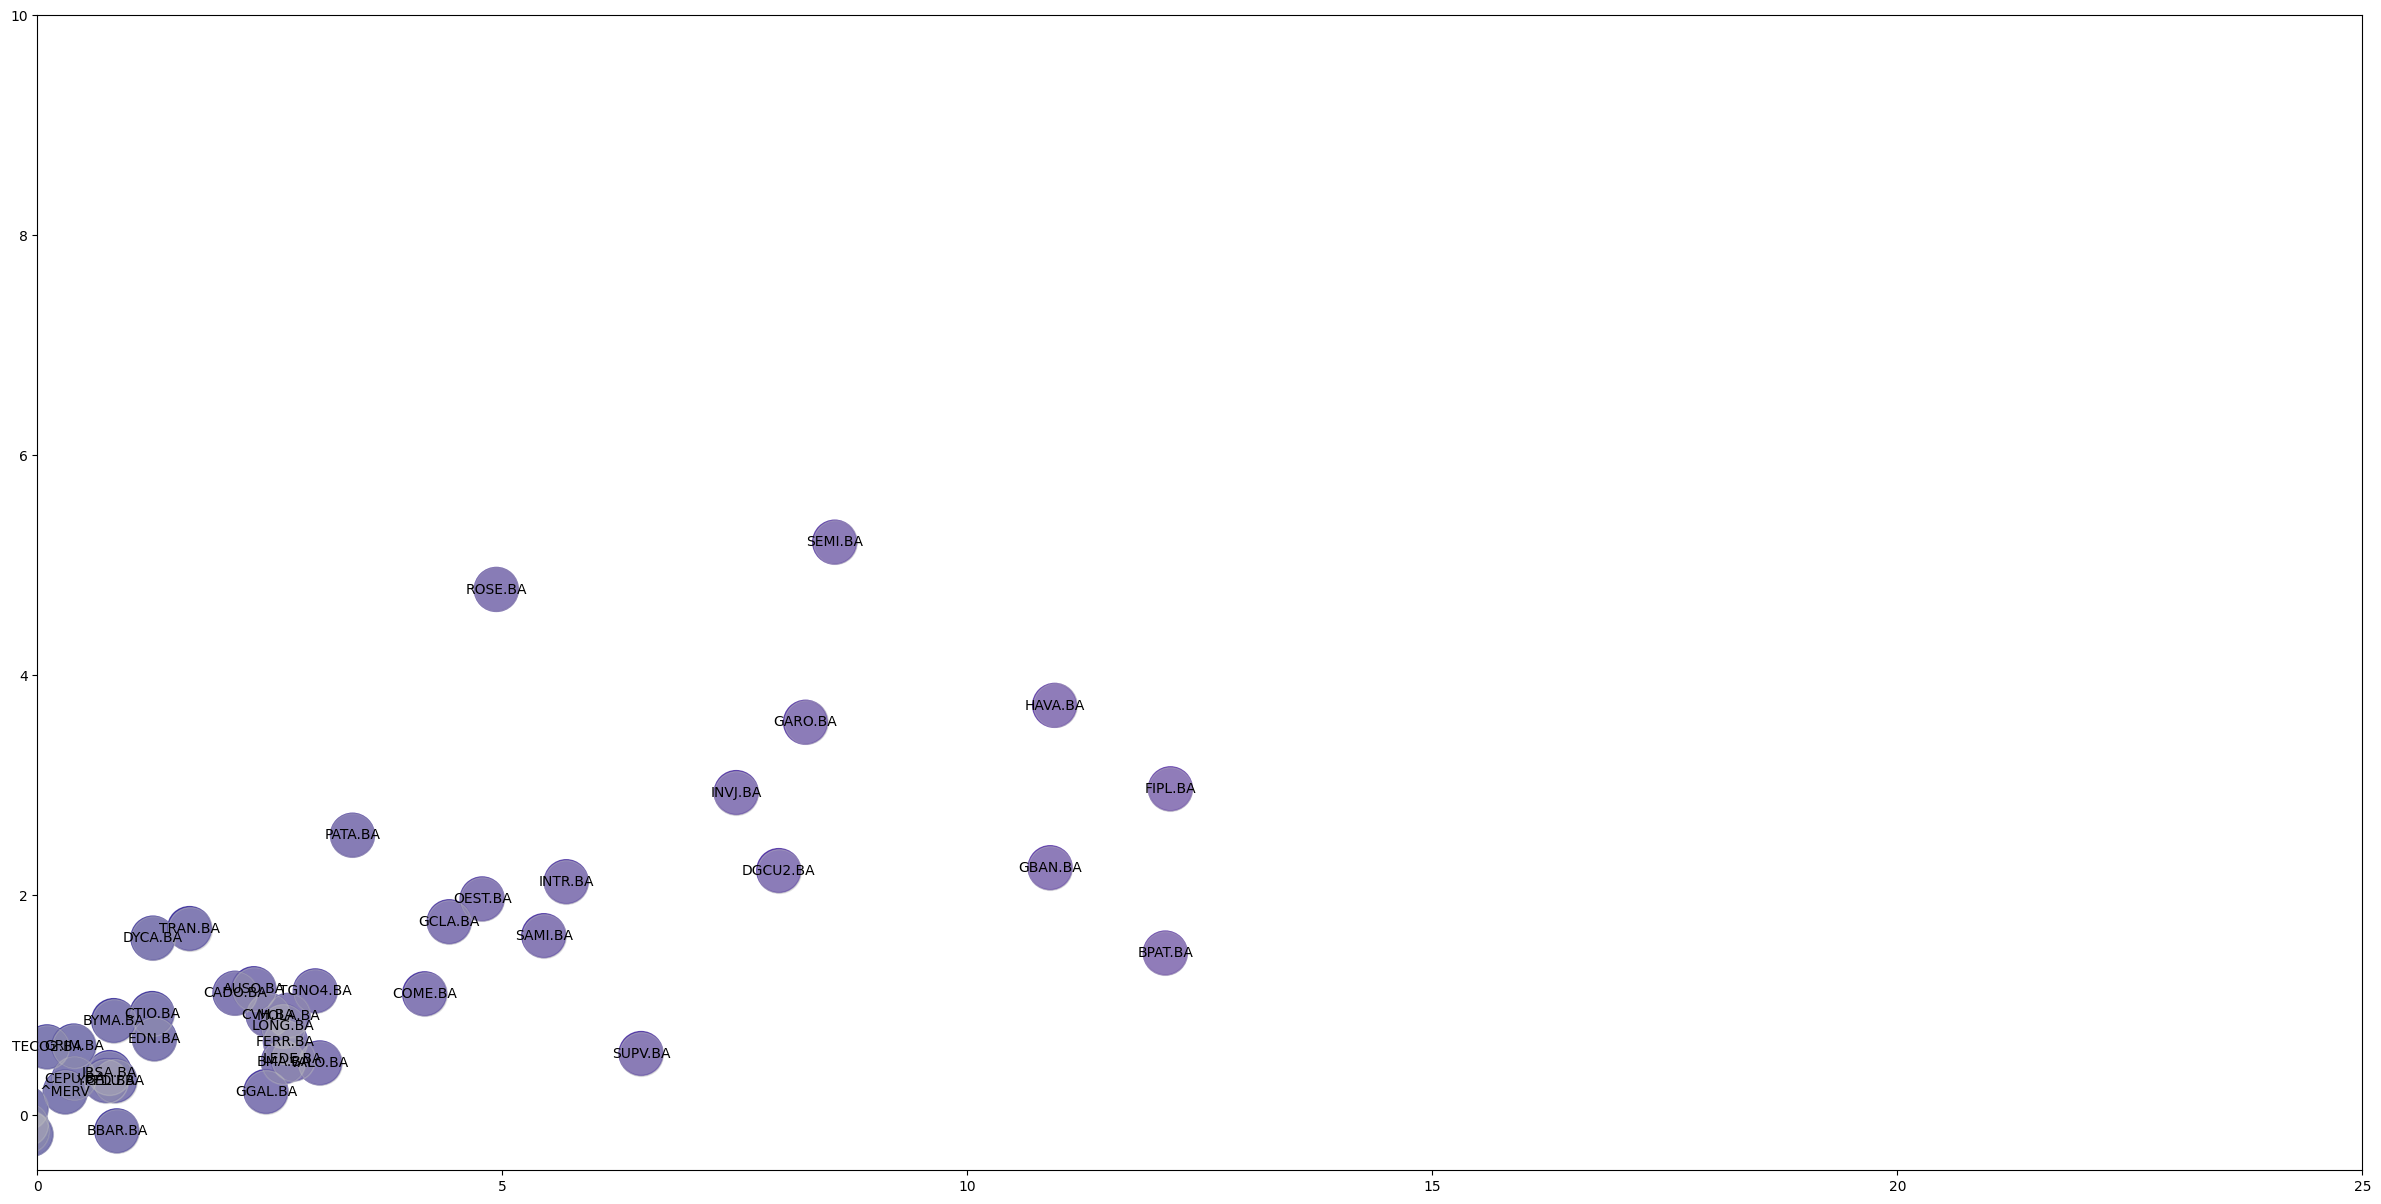

In [14]:
# Habría que filtrar por volumen
plt.style.use('seaborn-bright')
fig, ax = plt.subplots(figsize = (30, 15))

ax.scatter(x, y, c = x, s = 1000, alpha = 0.7, cmap='plasma')
for x,y, label in zip(x, y, x.index):
        ax.scatter(x, y, c = 'silver', s = 1000, alpha = 0.4)
        ax.annotate(label, xy = (x, y), ha = 'center', va = 'center', fontsize = 10)
        ax.set_xlim(0, 25)
        ax.set_ylim(-0.5, 10)

# ax.set_xlabel('% Variación 1Y\n', fontsize = 15)
# ax.set_ylabel('\n Variación 6M anualizada', fontsize = 15)

plt.show()

In [15]:
y = (1+pct_chg_matrix['6M'])**2 - 1
x = (1+pct_chg_matrix['3M'])**4 - 1
# x = pct_chg_matrix['1Y']
# y = (1+pct_chg_matrix['6M']) - 1
# x = (1+pct_chg_matrix['3M'])*2 - 1
# x = pct_chg_matrix['1Y']

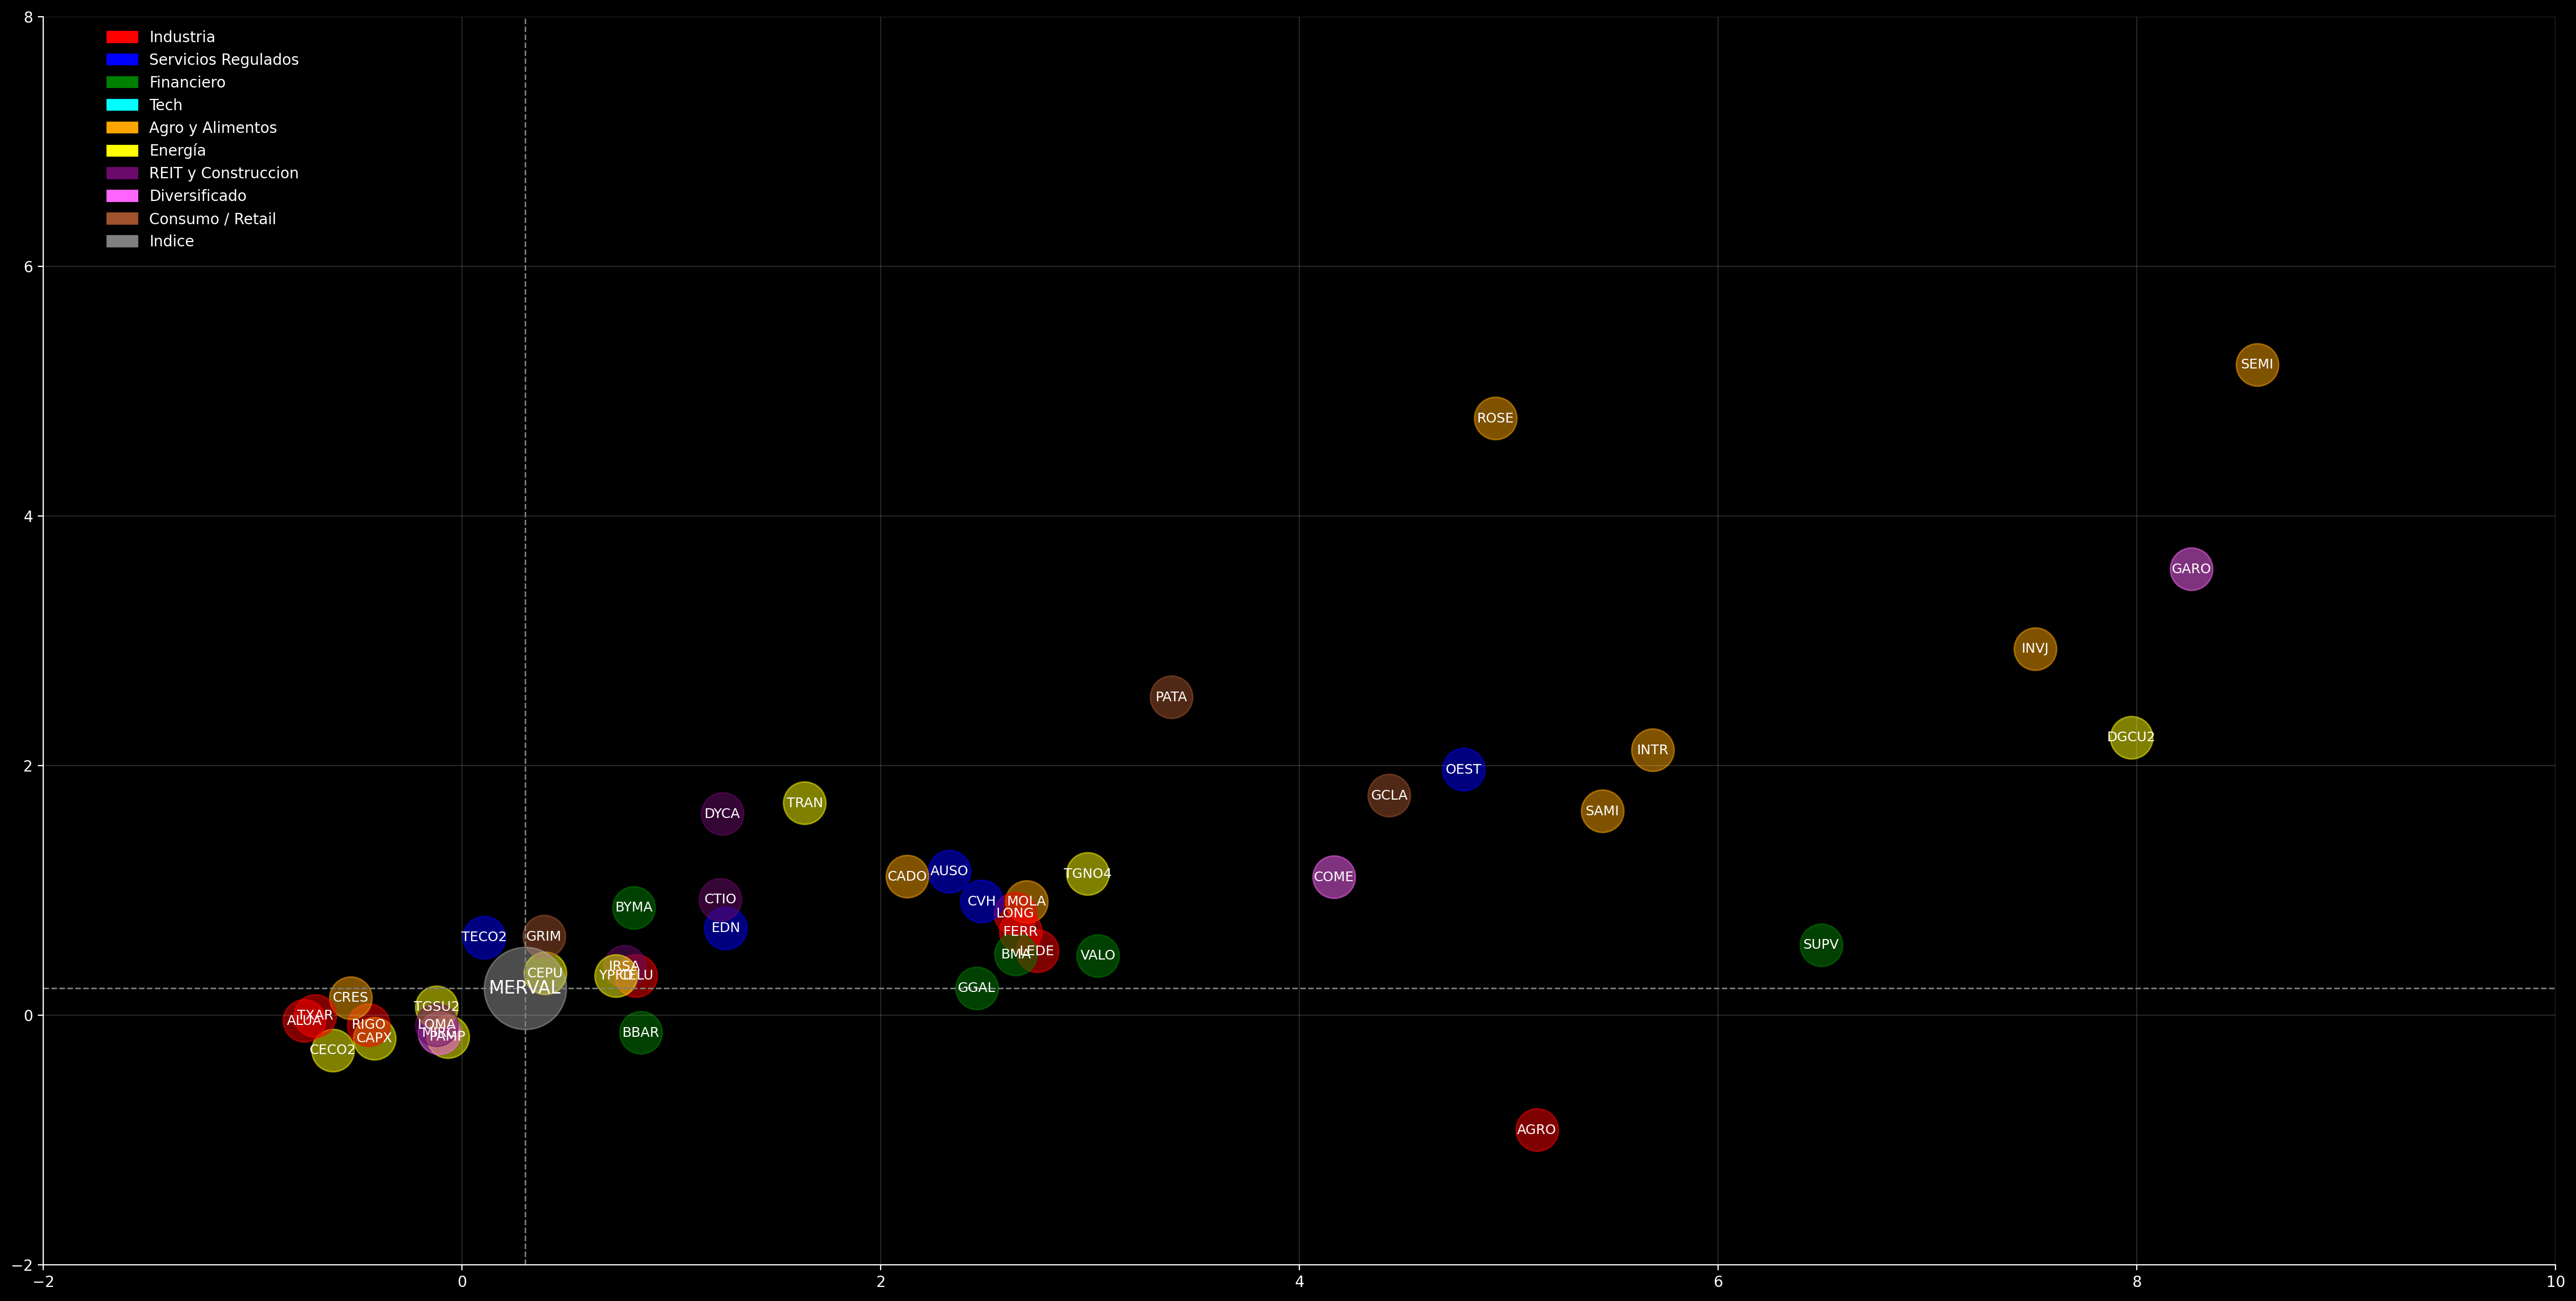

In [16]:
plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(figsize=(30, 15))

industry_color = {
    "Industria": "red",
    "Servicios Regulados": "blue",
    "Financiero": "green",
    "Tech": "cyan",
    "Agro y Alimentos": "orange",
    "Energía": "yellow",
    "REIT y Construccion": "#6A0A6A",
    "Diversificado": "#FF66FF",
    "Consumo / Retail": "sienna",
    "Indice": "gray"
}


for x,y, label in zip(x, y, x.index):
    industry = sector_dictionary[label]
    color = industry_color[industry]
    if (label!="^MERV"):
        ax.annotate(label[:-3], xy=(x,y), ha='center', va='center', fontsize=9)
        ax.scatter(x,y, c=color, s=800, alpha=0.5)
    else:
        ax.annotate('MERVAL', xy=(x,y), ha='center', va='center', fontsize=12)
        ax.scatter(x,y, c='silver', s=3000, alpha=0.4)
        ax.axhline(y, ls='--', lw=1, color='gray')
        ax.axvline(x, ls='--', lw=1, color='gray')


ax.set_xlim(-2, 10) # int(x.quantile(0.9))
ax.set_ylim(-2, 8) #

legend_patches = [Patch(color=color, label=industry) for industry, color in industry_color.items()]
ax.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(0.02, 1), ncols=1, frameon=False)

ax.grid(alpha = 0.15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [19]:
tabla

{'3M': -0.7541429931849968, '6M': -0.046920148674258755}

In [18]:
tabla = {'3M': x, '6M': y}
tabla = pd.DataFrame(tabla)
tabla

ValueError: If using all scalar values, you must pass an index

In [ ]:
sectores = pd.DataFrame(sector_dictionary.values(), index = sector_dictionary.keys(), columns = ['Sectores'])
sectores

In [ ]:
tabla = pd.merge(tabla, sectores, left_index=True, right_index=True)
tabla

In [ ]:
tabla[(tabla['Sectores'] == 'Energía') | (tabla['Sectores'] == 'Financiero')]

In [ ]:
sns.lmplot(x="3M", y="6M", hue="Sectores", data = tabla, palette="Set1")

In [ ]:
sns.lmplot(x="3M", y="6M", hue="Sectores", data=tabla[(tabla['Sectores'] == 'Energía') | (tabla['Sectores'] == 'Financiero')], palette="Set1")